# Task 1:  Multinomial Regression

In [56]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
# Importing wandb
import wandb
import os
plt.style.use('ggplot')
os.environ['WANDB_SILENT'] = 'true'

In [57]:
# Loading the csv
df = pd.read_csv('../data/WineQT.csv').drop(columns='Id') # Dropping Id column
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [58]:
# Statistics for all values shown in a table
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043  
std       0.156664     0.170399     1.082196     0.805824  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.205000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

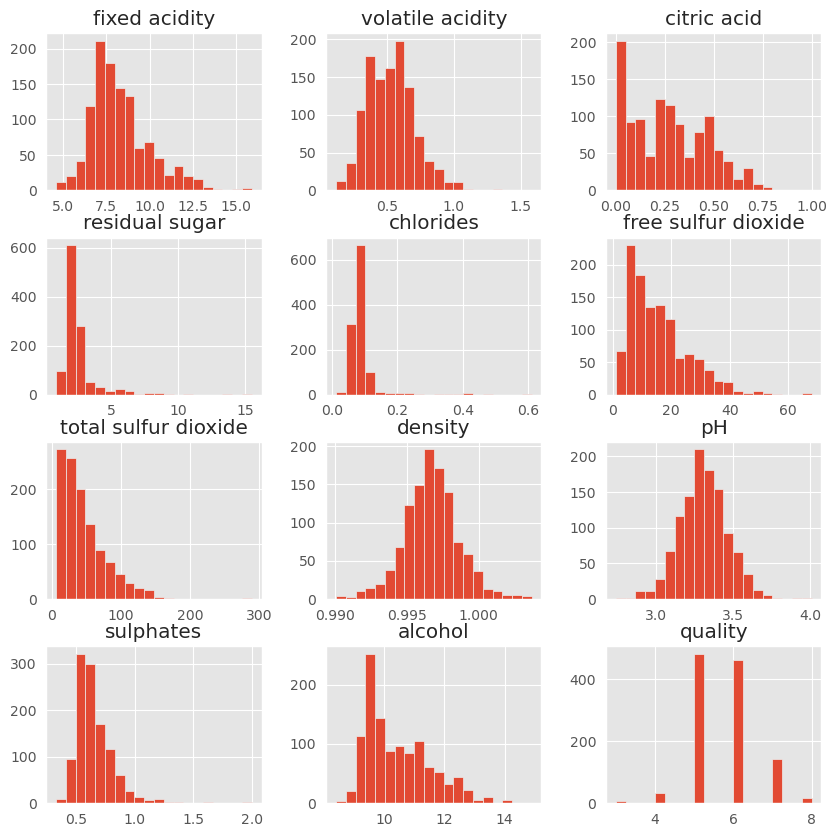

In [59]:
# Plotting the histograms for all the features
df.hist(figsize=(10,10), bins=20)

In [60]:
# Printing if data is null
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing data in the given dataset. We can check for outliers / incorrect data by plotting box plots

<Axes: >

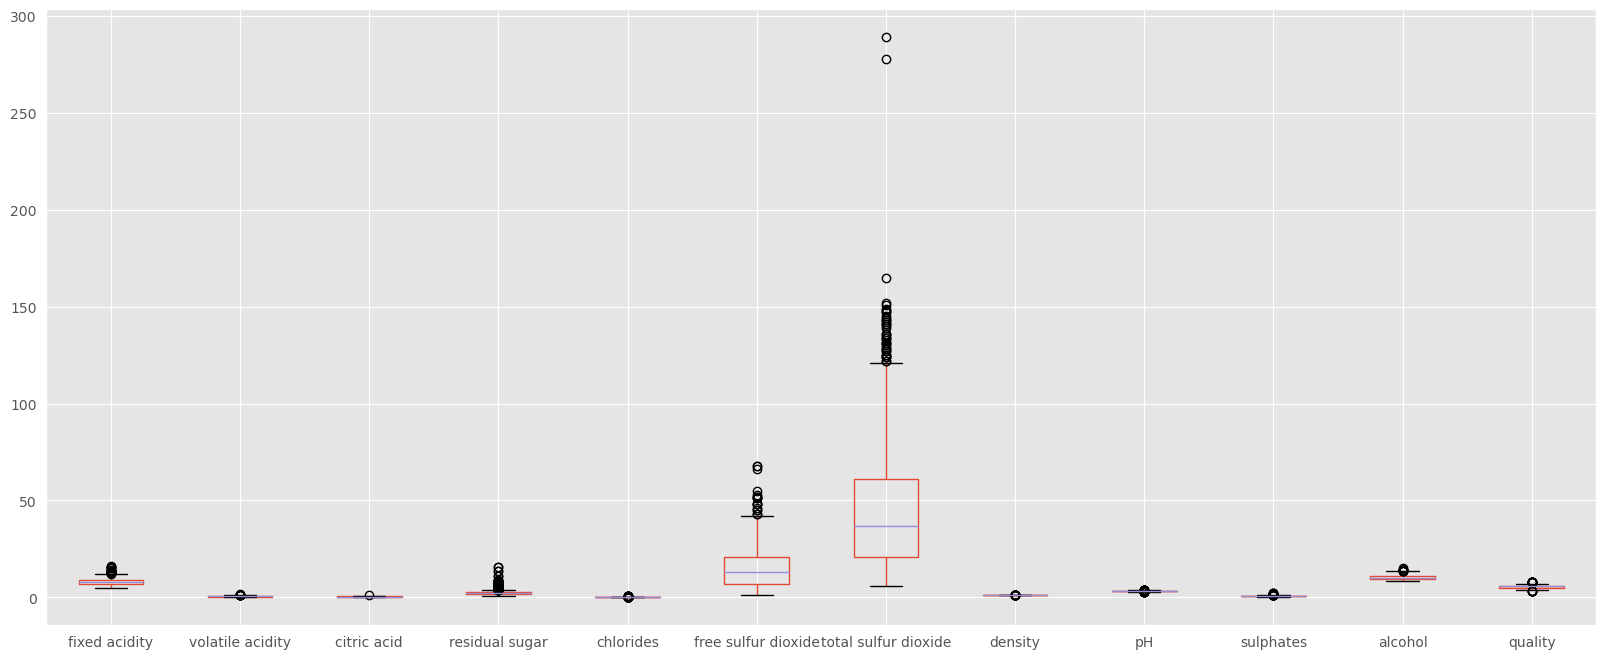

In [61]:
# Plotting box plots for all the features
df.boxplot(figsize=(20,8))

As can be seen from box-plots, the number of outliers are large for some features. Dropping them would lead to a loss of a lot of data.

Hence, we will not drop them. We will now standardize the data.

In [7]:
# Selecting features and labels
X = df.drop(columns='quality')
y = df['quality']
X.shape, y.shape

((1143, 11), (1143,))

In [8]:
# Normalize the data using numpy 
X = (X - X.mean()) / X.std()
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.521351          0.938921    -1.364429       -0.466217  -0.231294   
1      -0.292465          1.940963    -1.364429        0.050038   0.234144   
2      -0.292465          1.272935    -1.161059       -0.171214   0.107207   
3       1.653065         -1.399177     1.482750       -0.466217  -0.252450   
4      -0.521351          0.938921    -1.364429       -0.466217  -0.231294   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.450270             -0.363451  0.555611  1.270139  -0.573407   
1             0.915519              0.643195  0.036149 -0.708617   0.130824   
2            -0.060045              0.246637  0.140041 -0.325632  -0.045234   
3             0.135068              0.429664  0.659504 -0.963941  -0.456035   
4            -0.450270             -0.363451  0.555611  1.270139  -0.573407   

    alcohol  
0 -0.962960  
1 -0.593341  
2 -0.593341  
3 -0.593341  
4 -0.962960

2 features are selected out of the 11 features using PCA to justify the selection.

In [9]:
selected_features = ['fixed acidity', 'alcohol']

Now the data is split into train, test and validation set into 60%, 20% and 20% respectively.

In [12]:
# Splitting the data into train, test first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting train set into train and validation set. 0.25 * 0.8 = 0.2
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Convert to np array
X_train = X_train.to_numpy()
X_val = X_val.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

## 1.2 Model Implementation [20 marks]

The following model is an implementation of multinomial logistic regression for classification which we will use on the wine dataset.

In [13]:
# Static functions for the models
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

In [32]:
class MultinomialLogRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None
        self.classes = None
        self.n_features = None
        self.n_classes = None
        self.n_samples = None
        self.loss = None
        
    def initialize_with_random(self, n_classes, n_features):
        self.weights = np.random.randn(n_features, n_classes)
        self.bias = np.random.randn(1, n_classes)
        
    def encode_labels(self, y):
        if self.classes is None:
            self.classes = np.unique(y)
            self.n_classes = len(self.classes)
        class_idx = dict()
        for i in range(self.n_classes):
            class_idx[self.classes[i]] = i
        
        y_one_hot = np.zeros((len(y), self.n_classes))
        for i in range(len(y)):
            y_one_hot[i][class_idx[y[i]]] = 1
            
        return y_one_hot
            
    def cross_entropy_loss(self, activations, y_hat_one_hot):
        self.loss = -np.sum(y_hat_one_hot * np.log(activations)) / len(y_hat_one_hot)   
        return self.loss  
    
    def get_loss(self, X, y):
        y_hat_one_hot = self.encode_labels(y)
        z = np.dot(X, self.weights) + self.bias
        activations = softmax(z)
        loss = self.cross_entropy_loss(activations, y_hat_one_hot)
        return loss
    
    def perform_gradient_descent(self, X, y_hat_one_hot, activations):
        dw = (1 / self.n_samples) * np.dot(X.T, (activations - y_hat_one_hot))
        db = (1 / self.n_samples) * np.sum(activations - y_hat_one_hot, axis=0)
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db
        
    def accuracy(self, y_pred, y_true):
        return np.sum(y_pred == y_true) / len(y_true)
        
    def fit(self, X, y, val_data = None):
        self.n_samples, self.n_features = X.shape
        y_one_hot = self.encode_labels(y)
        self.initialize_with_random(self.n_classes, self.n_features)
        self.train(X, y_one_hot, val_data)
    
    def train(self, X, y_hat_one_hot, val_data = None):
        for i in range(1, self.max_iter + 1):
            z = np.dot(X, self.weights) + self.bias
            activations = softmax(z)
            loss = self.cross_entropy_loss(activations, y_hat_one_hot)
            self.perform_gradient_descent(X, y_hat_one_hot, activations)
            if i % 100 == 0:
                print(f'Loss at epoch {i} is {loss}, accuracy is {self.accuracy(np.argmax(activations, axis=1), np.argmax(y_hat_one_hot, axis=1))}')
            if val_data is not None:
                # Predict on validation set
                X_val, y_val = val_data
                y_hat_one_hot_val = self.encode_labels(y_val)
                z_val = np.dot(X_val, self.weights) + self.bias
                activations_val = softmax(z_val)
                loss_val = self.cross_entropy_loss(activations_val, y_hat_one_hot_val)
                print(f'Validation loss at epoch {i} is {loss_val}, accuracy is {self.accuracy(np.argmax(activations_val, axis=1), np.argmax(y_hat_one_hot_val, axis=1))}')
                if wandb.run is not None:
                    wandb.log({'loss': loss_val, 'accuracy': self.accuracy(np.argmax(activations_val, axis=1), np.argmax(y_hat_one_hot_val, axis=1))}, step=i)
        z = np.dot(X, self.weights) + self.bias
        activations = softmax(z)
        loss = self.cross_entropy_loss(activations, y_hat_one_hot)
        return self.accuracy(np.argmax(activations, axis=1), np.argmax(y_hat_one_hot, axis=1)), loss
                  
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        activations = softmax(z)
        class_indices = np.argmax(activations, axis=1)
        y_pred = np.array([self.classes[i] for i in class_indices])
        return  y_pred

In [45]:
# Creating an instance of the model
model = MultinomialLogRegression(learning_rate=0.01, max_iter=4000)

In [46]:
# Fitting the model on the training data
model.fit(X_train, y_train,( X_val, y_val))

Validation loss at epoch 1 is 4.358116140751031, accuracy is 0.12663755458515283
Validation loss at epoch 2 is 4.350881686907685, accuracy is 0.12663755458515283
Validation loss at epoch 3 is 4.343659117395379, accuracy is 0.12663755458515283
Validation loss at epoch 4 is 4.336448421505499, accuracy is 0.12663755458515283
Validation loss at epoch 5 is 4.329249588491403, accuracy is 0.12663755458515283
Validation loss at epoch 6 is 4.322062607569241, accuracy is 0.12663755458515283
Validation loss at epoch 7 is 4.31488746791875, accuracy is 0.13100436681222707
Validation loss at epoch 8 is 4.307724158684069, accuracy is 0.13100436681222707
Validation loss at epoch 9 is 4.300572668974556, accuracy is 0.13100436681222707
Validation loss at epoch 10 is 4.293432987865601, accuracy is 0.13100436681222707
Validation loss at epoch 11 is 4.286305104399453, accuracy is 0.13100436681222707
Validation loss at epoch 12 is 4.2791890075860435, accuracy is 0.13100436681222707
Validation loss at epoch 

In [47]:
print('Classification report on test set')
print(classification_report(y_test, model.predict(X_test), zero_division=0))
print('Loss on test set is', model.get_loss(X_test, y_test))

Classification report on test set
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.69      0.75      0.72        96
           6       0.62      0.65      0.63        99
           7       0.47      0.35      0.40        26
           8       0.00      0.00      0.00         2

    accuracy                           0.63       229
   macro avg       0.30      0.29      0.29       229
weighted avg       0.61      0.63      0.62       229

Loss on test set is 0.9347172219572334


In [18]:
selected_col_idx = [1, 10]
X_vis_train = X_train[:, selected_col_idx]
X_vis_test = X_test[:, selected_col_idx]

In [19]:
x_min, x_max = X_vis_test[:, 0].min(), X_vis_test[:, 0].max()
y_min, y_max = X_vis_test[:, 1].min(), X_vis_test[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
model.fit(X_vis_train, y_train)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Loss at epoch 100 is 1.1827450504510442, accuracy is 0.5576642335766423
Loss at epoch 200 is 1.02829606576895, accuracy is 0.5693430656934306
Loss at epoch 300 is 1.0074237430061648, accuracy is 0.5693430656934306
Loss at epoch 400 is 0.9997140501210304, accuracy is 0.5708029197080292
Loss at epoch 500 is 0.9955267784256636, accuracy is 0.5737226277372263
Loss at epoch 600 is 0.9927968059377206, accuracy is 0.5751824817518248
Loss at epoch 700 is 0.9908153316809404, accuracy is 0.5737226277372263
Loss at epoch 800 is 0.989285008470482, accuracy is 0.5737226277372263
Loss at epoch 900 is 0.9880583168980493, accuracy is 0.5737226277372263
Loss at epoch 1000 is 0.9870504164836083, accuracy is 0.5737226277372263
Loss at epoch 1100 is 0.9862066565805627, accuracy is 0.5737226277372263
Loss at epoch 1200 is 0.9854891515473823, accuracy is 0.5737226277372263
Loss at epoch 1300 is 0.9848705207943932, accuracy is 0.5737226277372263
Loss at epoch 1400 is 0.9843305181639697, accuracy is 0.5737226

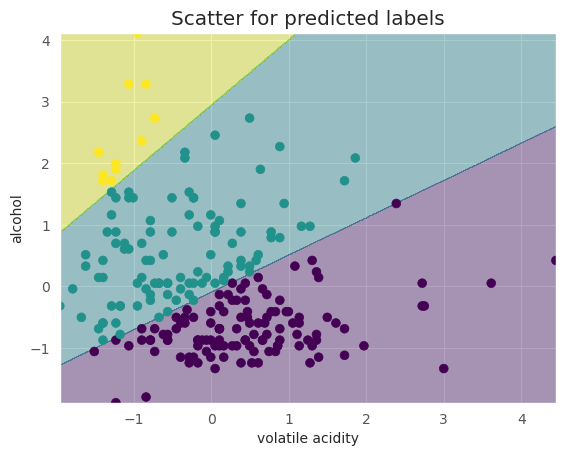

In [20]:
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.4)
plt.scatter(X_vis_test[:, 0], X_vis_test[:, 1], c=model.predict(X_vis_test), cmap='viridis', s=40)
plt.title('Scatter for predicted labels')
plt.xlabel(df.columns[selected_col_idx[0]])
plt.ylabel(df.columns[selected_col_idx[1]])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

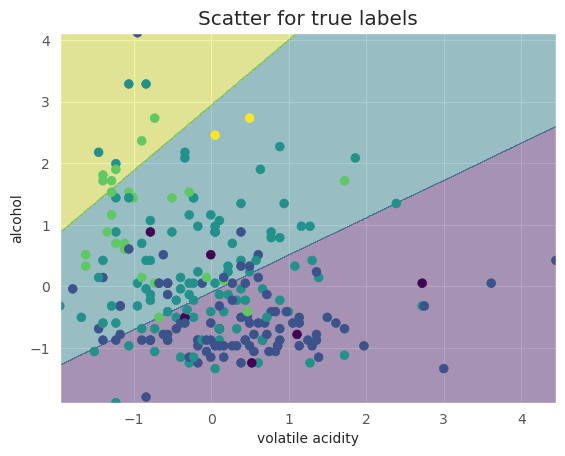

In [21]:
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.4)
plt.scatter(X_vis_test[:, 0], X_vis_test[:, 1], c=y_test, cmap='viridis', s=40)
plt.title('Scatter for true labels')
plt.xlabel(df.columns[selected_col_idx[0]])
plt.ylabel(df.columns[selected_col_idx[1]])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

## 1.3  Hyperparameter Tuning and Evaluation [15 marks]

We use the wandb library to perform hyperparameter tuning and logging of the results.

In [48]:
wandb.login()

True

In [52]:
def objective(config):
    lr = config.learning_rate
    epochs = config.epochs
    model = MultinomialLogRegression(learning_rate=lr, max_iter=epochs)
    model.fit(X_train, y_train, val_data=(X_val, y_val))
    return

def run_wandb():
    wandb.init(group='multinomial-hyperparams')
    objective(wandb.config)

In [53]:
# Defining search space for a sweep
sweep_config = {
    "method": "random",
    "metric": {
        "name": "accuracy",
        "goal": "maximize"
    },
    "parameters": {
        "learning_rate": {
            "values": [0.1, 0.01, 0.001]
        },
        "epochs": {
            "values": [1000, 3000, 5000, 7500]
        }
    }
}

In [55]:
sweep_id = wandb.sweep(sweep=sweep_config, project='assignment-3')
wandb.agent(sweep_id, function=run_wandb, count=7)

Create sweep with ID: jialf06c
Sweep URL: https://wandb.ai/arnav-team/assignment-3/sweeps/jialf06c
Validation loss at epoch 1 is 4.560309074015855, accuracy is 0.14847161572052403
Validation loss at epoch 2 is 4.481773579943831, accuracy is 0.15283842794759825
Validation loss at epoch 3 is 4.404537805038037, accuracy is 0.1572052401746725
Validation loss at epoch 4 is 4.328607188462058, accuracy is 0.1572052401746725
Validation loss at epoch 5 is 4.253986333513381, accuracy is 0.1703056768558952
Validation loss at epoch 6 is 4.180678957391113, accuracy is 0.17467248908296942
Validation loss at epoch 7 is 4.108687820942942, accuracy is 0.17467248908296942
Validation loss at epoch 8 is 4.038014642577858, accuracy is 0.17903930131004367
Validation loss at epoch 9 is 3.968660002001072, accuracy is 0.18340611353711792
Validation loss at epoch 10 is 3.900623240520751, accuracy is 0.19213973799126638
Validation loss at epoch 11 is 3.833902365278403, accuracy is 0.1965065502183406
Validation l

# 2 Multi Layer Perceptron Classification

We code an MLP classifier from scratch to use on the Wine dataset. We will use the same train/test split as in the previous exercise.

## 2.1 Model Implementation from scratch


We implement the MLP model as a class.

In [63]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

# Derivatives
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh_deriv(x):
    return 1 - np.tanh(x)**2

def relu_deriv(x):
    return np.where(x > 0, 1, 0)

def softmax_deriv(x):
    return softmax(x) * (1 - softmax(x))

In [6]:
def cross_entropy_loss(activations, y_hat_one_hot):
    return -np.sum(y_hat_one_hot * np.log(activations)) / len(y_hat_one_hot)

'''
    Multi Layer Perceptron class with fully connected hidden layers.
    args: 
        hidden_layers: list of integers, number of neurons in each hidden layer
        epochs: int, number of epochs to train the model
        learning_rate: float, learning rate for gradient descent
        activation: string, activation function to use in hidden layers
        optimizer: string, optimizer to use for gradient descent
'''
class MLPClassifier:
    def __init__(self, hidden_layers, epochs=1000, learning_rate=0.01, activation='sigmoid', optimizer='sgd', logging=False):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = []
        self.biases = []
        self.n_hidden = len(hidden_layers)
        self.hidden_layer_sizes = hidden_layers
        
        self.output_size = None
        self.classes = None
        self.input_size = None
        
        self.logging = logging
        
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_deriv = sigmoid_deriv
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_deriv = tanh_deriv
        elif activation == 'relu':
            self.activation = relu
            self.activation_deriv = relu_deriv
        else:
            raise ValueError('Activation function not recognized')
        
        if optimizer == 'sgd':
            self.optimizer = self.sgd
        elif optimizer == 'batch':
            self.optimizer = self.batch
        elif optimizer == 'mini-batch':
            self.optimizer = self.mini_batch
        else:
            raise ValueError('Optimizer not recognized')
        
    def get_params(self):
        return {'epochs': self.epochs, 'learning_rate': self.learning_rate, 'hidden_layers': self.hidden_layer_sizes,
                 'optimizer': self.optimizer.__name__, 'activation': self.activation.__name__}

    def encode_labels(self, y):
        if self.output_size is None:
            self.classes = np.unique(y)
            self.output_size = len(self.classes)
        class_idx = dict()
        for i in range(self.output_size):
            class_idx[self.classes[i]] = i

        y_one_hot = np.zeros((len(y), self.output_size))
        for i in range(len(y)):
            y_one_hot[i][class_idx[y[i]]] = 1
        return y_one_hot

    def decode_labels(self, y_one_hot):
        y = np.argmax(y_one_hot, axis=1)
        y_decoded = [self.classes[i] for i in y]
        return y_decoded
        
    def get_loss(self, X, y):
        # Get activations :
        activations = self.forward_propagation(X)
        y_hat_one_hot = self.encode_labels(y)
        loss = cross_entropy_loss(activations, y_hat_one_hot)
        return loss

    def initialise_parameters(self):
        for i in range(self.n_hidden):
            if i == 0:
                self.weights.append(np.random.randn(self.input_size, self.hidden_layer_sizes[i]) / np.sqrt(self.input_size))
                self.biases.append(np.zeros((1, self.hidden_layer_sizes[i])))
            else:
                self.weights.append(np.random.randn(self.hidden_layer_sizes[i-1], self.hidden_layer_sizes[i]) / np.sqrt(self.hidden_layer_sizes[i-1]))
                self.biases.append(np.zeros((1, self.hidden_layer_sizes[i])))
        self.weights.append(np.random.randn(self.hidden_layer_sizes[-1], self.output_size) / np.sqrt(self.hidden_layer_sizes[-1]))
        self.biases.append(np.zeros((1, self.output_size)))

    def forward_propagation(self, X):
        # Cache to store a, a_deriv and z for each layer
        cache = []
        for i in range(self.n_hidden):
            # Add col of 1s for bias term
            cache.append(dict())
            cache[i]['z'] = np.dot(X, self.weights[i]) + self.biases[i]
            cache[i]['a'] = self.activation(cache[i]['z'])
            cache[i]['a_deriv'] = self.activation_deriv(cache[i]['z'])
            X = cache[i]['a']
        
        # Output layer : Uses softmax as activation
        cache.append(dict())
        cache[-1]['z'] = np.dot(X, self.weights[-1]) + self.biases[-1]
        cache[-1]['a'] = softmax(cache[-1]['z'])   
        cache[-1]['a_deriv'] = softmax_deriv(cache[-1]['z'])
        
        output = cache[-1]['a']
        return output, cache
    
    def backward_propagation(self, cache, X ,y_ohe):
        # Store gradients for each layer, gradient refers to dJ/dz
        gradients = []
        
        # Output layer
        gradients.append(cache[-1]['a'] - y_ohe) # dZ_L, L = n_hidden
        
        for i in range(self.n_hidden - 1, -1, -1):
            # Calculate gradients
            gradients.append(np.dot(gradients[-1], self.weights[i+1].T) * cache[i]['a_deriv']) # dZ_i, i = n_hidden-1, ..., 0
            
        # Reverse gradients
        gradients = gradients[::-1]
        return gradients
    
    def sgd(self, X, y_ohe):
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        X_ = X[indices, :]
        y_ = y_ohe[indices, :]
        loss = 0
        for i in range(X.shape[0]):
            X_one = X_[i, :].reshape(1, -1)
            y_one = y_[i, :].reshape(1, -1)
            loss += self.train_on_batch(X_one, y_one)
        loss /= X.shape[0]
        return loss
                
    def batch(self, X, y_ohe):
        return self.train_on_batch(X, y_ohe)
                
    def mini_batch(self, X, y_ohe):
        batch_size = 64
        rng = np.random.default_rng()
        loss = 0
        for i in range(0, len(X), batch_size):
            indices = rng.choice(len(X), size=batch_size, replace=False)
            X_batch = X[indices, :]
            y_batch = y_ohe[indices, :]
            loss += self.train_on_batch(X_batch, y_batch)
        return loss / (len(X) // batch_size)
    
    def train_on_batch(self, batch_X, batch_y):
        # Forward propagation
        activations, cache = self.forward_propagation(batch_X)
        # Calculate loss
        loss = cross_entropy_loss(activations, batch_y)
        # Backward propagation
        gradients = self.backward_propagation(cache, batch_X, batch_y)
        # Update params
        self.weights[0] -= self.learning_rate * np.dot(batch_X.T, gradients[0]) / len(batch_X)
        self.biases[0] -= self.learning_rate * np.sum(gradients[0], axis=0, keepdims=True) / len(batch_X)
        for i in range(1, self.n_hidden + 1):
            self.weights[i] -= self.learning_rate * np.dot(cache[i-1]['a'].T, gradients[i]) / len(batch_X)
            self.biases[i] -= self.learning_rate * np.sum(gradients[i], axis=0, keepdims=True) / len(batch_X)
        return loss
        
    def fit(self, X, y, val_data=None):
        # Validation data
        if val_data is not None:
            X_val, y_val = val_data
        self.input_size = X.shape[1]
        # Encode true labels
        y_one_hot = self.encode_labels(y)
        self.initialise_parameters()
        accuracies = []
        # Train loop
        for run in range(1, self.epochs+1):
            loss = self.optimizer(X, y_one_hot)

            if self.logging and val_data is not None:
                print(f'Epoch {run} - Loss : {loss}')
                activations, _ = self.forward_propagation(X_val)
                y_pred = self.decode_labels(activations)
                loss_val = cross_entropy_loss(activations, self.encode_labels(y_val))
                if wandb.run is not None:
                    wandb.log({'loss': loss_val, 'accuracy': accuracy_score(y_val, y_pred), 'f1': f1_score(y_val, y_pred, average='macro'), 'precision': precision_score(y_val, y_pred, average='macro'), 'recall': recall_score(y_val, y_pred, average='macro')}, step=run)
                print('Validation set :')
                print('Accuracy :', accuracy_score(y_val, y_pred))
                accuracies.append(accuracy_score(y_val, y_pred))
                print('Loss :', loss_val)
        return accuracies
        
    def predict(self, X):
        # Forward propagation
        activations, _ = self.forward_propagation(X)
        # Get predictions
        predictions = self.decode_labels(activations)
        
        return predictions        

## 2.2 Model Training & Hyperparameter Tuning using W&B

We use the wandb library to log the training process and hyperparameters. We use the same train/test split as in the previous exercise.

We track the following metrics on val set
- Loss
- Accuracy
- F1 score
- Precision
- Recall

In [7]:
# Wandb setup
wandb.login()

True

In [27]:
# wandb.init(project='assignment-3', group='MLP-classifier', name='val-set-logging',
#            config={
#                'hidden_layers': [20, 20],
#                'epochs': 15,
#                'learning_rate': 0.01,
#                'activation': 'tanh',
#                'optimizer': 'mini-batch',
#                })

In [28]:
mlp = MLPClassifier(hidden_layers=[20, 20], epochs=15, learning_rate=0.01, activation='tanh', optimizer='mini-batch', logging=True)
mlp.fit(X_train, y_train, val_data=(X_val, y_val))
# wandb.finish()

Epoch 1 - Loss : 1.9996580614803072
Validation set :
Accuracy : 0.25327510917030566
Loss : 1.7895364154733966
Epoch 2 - Loss : 1.961238944604346
Validation set :
Accuracy : 0.27074235807860264
Loss : 1.723400345355704
Epoch 3 - Loss : 1.8428733078713584
Validation set :
Accuracy : 0.3056768558951965
Loss : 1.6630941746640744
Epoch 4 - Loss : 1.8216920545450932
Validation set :
Accuracy : 0.314410480349345
Loss : 1.60979424628633
Epoch 5 - Loss : 1.727212064487348
Validation set :
Accuracy : 0.31877729257641924
Loss : 1.561645909688517
Epoch 6 - Loss : 1.6953797731212945
Validation set :
Accuracy : 0.33624454148471616
Loss : 1.5167219811459058
Epoch 7 - Loss : 1.6165482183397493
Validation set :
Accuracy : 0.34934497816593885
Loss : 1.4784756471488403
Epoch 8 - Loss : 1.622258339850104
Validation set :
Accuracy : 0.3624454148471616
Loss : 1.4432901377552785
Epoch 9 - Loss : 1.5536739962062633
Validation set :
Accuracy : 0.388646288209607
Loss : 1.4109851024927331
Epoch 10 - Loss : 1.509

[0.25327510917030566,
 0.27074235807860264,
 0.3056768558951965,
 0.314410480349345,
 0.31877729257641924,
 0.33624454148471616,
 0.34934497816593885,
 0.3624454148471616,
 0.388646288209607,
 0.40611353711790393,
 0.4279475982532751,
 0.4497816593886463,
 0.4672489082969432,
 0.4847161572052402,
 0.5021834061135371]

We report the f1 - scores on the val set, sweeping through the combinations of the following hyperparameters
- Activation function : sigmoid, tanh, relu
- Optimizer : sgd, batch, mini-batch

In [29]:
# Wandb setup
sweep_config_1 = {
    'name': 'optimizer-activation-sweep',
    'group': 'MLP-hyperparams-1',
    'method': 'grid',
    'metric': {
        'name': 'f1',
        'goal': 'maximize'
    },
    'parameters': {
        'activation': {
            'values': ['sigmoid', 'tanh', 'relu']
        },
        'optimizer': {
            'values': ['sgd', 'batch', 'mini-batch']
        }
    }
}

In [30]:
# sweep_id_1 = wandb.sweep(sweep_config_1, project='assignment-3')

Create sweep with ID: dj5qo21e
Sweep URL: https://wandb.ai/arnav-team/assignment-3/sweeps/dj5qo21e


In [31]:
def run():
    wandb.init(group='MLP-hyperparams-1')
    config = wandb.config
    mlp = MLPClassifier(hidden_layers=[10, 10], epochs=15, learning_rate=0.01, activation=config.activation, optimizer=config.optimizer, logging=True)
    mlp.fit(X_train, y_train, val_data=(X_val, y_val))
    # TODO: 
    wandb.finish()

In [32]:
# wandb.agent(sweep_id_1, function=run)

Now we sweep for learning rate, epochs and hidden layer sizes, keeping number of hidden layers fixed at 2.

In [33]:
sweep_config_2 = {
    'name': 'learning-rate-epochs-hidden-layers-sweep',
    'group': 'MLP-hyperparams-2',
    'method': 'grid',
    'metric': {
        'name': 'f1',
        'goal': 'maximize'
    },
    'parameters': {
        'learning_rate': {
            'values': [0.1, 0.01, 0.001]
        },
        'epochs': {
            'values': [10, 15, 20]
        },
        'hidden_layers': {
            'values': [[10, 10], [20, 20], [30, 30]]
        }
    }
}

In [34]:
# sweep_id_2 = wandb.sweep(sweep_config_2, project='assignment-3')

Create sweep with ID: e8fgm5to
Sweep URL: https://wandb.ai/arnav-team/assignment-3/sweeps/e8fgm5to


In [35]:
def run_2():
    wandb.init(group='MLP-hyperparams-2')
    config = wandb.config
    mlp = MLPClassifier(hidden_layers=config.hidden_layers, epochs=config.epochs, learning_rate=config.learning_rate, activation='tanh', optimizer='mini-batch', logging=True)
    mlp.fit(X_train, y_train, val_data=(X_val, y_val))
    # TODO: 
    wandb.finish()

In [36]:
# wandb.agent(sweep_id_2, function=run_2)

## 2.3 Evaluating Model [10 marks]

We evaluate the model on the test set using the best hyperparameters found in the previous section.

In [37]:
mlp = MLPClassifier(hidden_layers=[30, 30, 30], epochs=200, learning_rate=0.01, activation='relu', optimizer='mini-batch', logging=False)
mlp.fit(X_train, y_train, val_data=(X_val, y_val))

[]

In [38]:
print(classification_report(y_test, mlp.predict(X_test), zero_division=0))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.65      0.75      0.70        96
           6       0.60      0.60      0.60        99
           7       0.53      0.38      0.44        26
           8       0.00      0.00      0.00         2

    accuracy                           0.62       229
   macro avg       0.35      0.35      0.35       229
weighted avg       0.59      0.62      0.60       229


### Results compared to Multinomial Logistic Regression:

With the right hyperparameters, MLP models beat Multinomial regression on this task. Furthermore, given more data MLP models have more parameters to train on and hence can adapt better than simple multinomial regression.

## 2.4 Multi-Label Classification 

Model implementation:

In [62]:
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, OneHotEncoder
from sklearn.metrics import hamming_loss
from sklearn.compose import ColumnTransformer

In [64]:
def binary_cross_entropy_loss(activations, y_hat):
    eps = 1e-15
    return -np.mean(y_hat * np.log(activations + eps) + (1 - y_hat) * np.log(1 - activations + eps))

class MLPClassifier_MultiLabel:
    def __init__(self, hidden_layers, epochs=100, learning_rate=0.01, activation='sigmoid', optimizer='sgd', logging=False):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = []
        self.biases = []
        self.n_hidden = len(hidden_layers)
        self.hidden_layer_sizes = hidden_layers
        
        self.output_size = None
        self.classes = None
        self.input_size = None
        
        self.logging = logging
        
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_deriv = sigmoid_deriv
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_deriv = tanh_deriv
        elif activation == 'relu':
            self.activation = relu
            self.activation_deriv = relu_deriv
        else:
            raise ValueError('Activation function not recognized')
        
        if optimizer == 'sgd':
            self.optimizer = self.sgd
        elif optimizer == 'batch':
            self.optimizer = self.batch
        elif optimizer == 'mini-batch':
            self.optimizer = self.mini_batch
        else:
            raise ValueError('Optimizer not recognized')
        
    def get_params(self):
        return {'epochs': self.epochs, 'learning_rate': self.learning_rate, 'hidden_layers': self.hidden_layer_sizes,
                 'optimizer': self.optimizer.__name__, 'activation': self.activation.__name__}

    def get_loss(self, X, y_one_hot):
        # Get activations :
        activations = self.forward_propagation(X)
        loss = binary_cross_entropy_loss(activations, y_one_hot)
        return loss

    def initialise_parameters(self):
        for i in range(self.n_hidden):
            if i == 0:
                self.weights.append(np.random.randn(self.input_size, self.hidden_layer_sizes[i]) / np.sqrt(self.input_size))
                self.biases.append(np.zeros((1, self.hidden_layer_sizes[i])))
            else:
                self.weights.append(np.random.randn(self.hidden_layer_sizes[i-1], self.hidden_layer_sizes[i]) / np.sqrt(self.hidden_layer_sizes[i-1]))
                self.biases.append(np.zeros((1, self.hidden_layer_sizes[i])))
        self.weights.append(np.random.randn(self.hidden_layer_sizes[-1], self.output_size) / np.sqrt(self.hidden_layer_sizes[-1]))
        self.biases.append(np.zeros((1, self.output_size)))

    def forward_propagation(self, X):
        # Cache to store a, a_deriv and z for each layer
        cache = []
        for i in range(self.n_hidden):
            # Add col of 1s for bias term
            cache.append(dict())
            cache[i]['z'] = np.dot(X, self.weights[i]) + self.biases[i]
            cache[i]['a'] = self.activation(cache[i]['z'])
            cache[i]['a_deriv'] = self.activation_deriv(cache[i]['z'])
            X = cache[i]['a']
        
        # Output layer : Uses sigmoid for multilabel as activation
        cache.append(dict())
        cache[-1]['z'] = np.dot(X, self.weights[-1]) + self.biases[-1]
        cache[-1]['a'] = sigmoid(cache[-1]['z'])   
        cache[-1]['a_deriv'] = sigmoid_deriv(cache[-1]['z'])
        
        output = cache[-1]['a']
        return output, cache
    
    def backward_propagation(self, cache, X ,y_ohe):
        # Store gradients for each layer, gradient refers to dJ/dz
        gradients = []
        
        # Output layer
        gradients.append((cache[-1]['a'] - y_ohe)) # dZ_L, L = n_hidden
        
        for i in range(self.n_hidden - 1, -1, -1):
            # Calculate gradients
            gradients.append(np.dot(gradients[-1], self.weights[i+1].T) * cache[i]['a_deriv']) # dZ_i, i = n_hidden-1, ..., 0
            
        # Reverse gradients
        gradients = gradients[::-1]
        return gradients
    
    def sgd(self, X, y_ohe):
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        X_ = X[indices, :]
        y_ = y_ohe[indices, :]
        loss = 0
        for i in range(X.shape[0]):
            X_one = X_[i, :].reshape(1, -1)
            y_one = y_[i, :].reshape(1, -1)
            loss += self.train_on_batch(X_one, y_one)
        loss /= X.shape[0]
        return loss
                
    def batch(self, X, y_ohe):
        return self.train_on_batch(X, y_ohe)
                
    def mini_batch(self, X, y_ohe):
        batch_size = 64
        rng = np.random.default_rng()
        loss = 0
        for i in range(0, len(X), batch_size):
            indices = rng.choice(len(X), size=batch_size, replace=False)
            X_batch = X[indices, :]
            y_batch = y_ohe[indices, :]
            loss += self.train_on_batch(X_batch, y_batch)
        return loss / (len(X) // batch_size)
    
    def train_on_batch(self, batch_X, batch_y):
        # Forward propagation
        activations, cache = self.forward_propagation(batch_X)
        # Calculate loss
        loss = binary_cross_entropy_loss(activations, batch_y)
        # Backward propagation
        gradients = self.backward_propagation(cache, batch_X, batch_y)
        # Update params
        self.weights[0] -= self.learning_rate * np.dot(batch_X.T, gradients[0]) / len(batch_X)
        self.biases[0] -= self.learning_rate * np.sum(gradients[0], axis=0, keepdims=True) / len(batch_X)
        for i in range(1, self.n_hidden + 1):
            self.weights[i] -= self.learning_rate * np.dot(cache[i-1]['a'].T, gradients[i]) / len(batch_X)
            self.biases[i] -= self.learning_rate * np.sum(gradients[i], axis=0, keepdims=True) / len(batch_X)
        return loss
        
    def fit(self, X, y_one_hot, val_data=None):
        # Validation data
        if val_data is not None:
            X_val, y_val = val_data
        self.input_size = X.shape[1]
        self.output_size = y_one_hot.shape[1]
        
        self.initialise_parameters()
        accuracies = []
        # Train loop
        for run in range(1, self.epochs+1):
            loss = self.optimizer(X, y_one_hot)

            if self.logging and val_data is not None:
                print(f'Epoch {run} - Loss : {loss}')
                activations, _ = self.forward_propagation(X_val)
                y_pred = activations > 0.5
                loss_val = binary_cross_entropy_loss(activations, y_val)
                if wandb.run is not None:
                    wandb.log({'loss': loss_val, 'accuracy': 1 - hamming_loss(y_val, y_pred), 'f1': f1_score(y_val, y_pred, average='macro', zero_division=0), 'precision': precision_score(y_val, y_pred, average='macro', zero_division=0), 'recall': recall_score(y_val, y_pred, average='macro', zero_division=0)}, step=run)
                print('Validation set :')
                print('Accuracy :', 1 - hamming_loss(y_val, y_pred))
                accuracies.append(1 - hamming_loss(y_val, y_pred))
                print('Loss :', loss_val)
        return accuracies
        
    def predict(self, X):
        # Forward propagation
        activations, _ = self.forward_propagation(X)
        # Get predictions
        predictions = (activations >= 0.5).astype(int)
        return predictions

In [65]:
adv = pd.read_csv('../data/advertisement.csv')
adv.head()

age  gender        income    education  married  children           city  \
0   45    Male  61271.953359       Master    False         3    Lake Sheila   
1   24  Female  53229.101074  High School    False         1   Crystalburgh   
2   45  Female  30066.046684     Bachelor     True         3  Margaretburgh   
3   19    Male  48950.246384          PhD    False         0  Williamshaven   
4   29  Female  44792.627094       Master    False         0       New Paul   

    occupation  purchase_amount most bought item  \
0       Doctor        87.697118          monitor   
1  Businessman       115.135586         lipstick   
2     Engineer       101.694559         biscuits   
3       Lawyer        97.964887            maggi   
4  Businessman        86.847281           carpet   

                             labels  
0       electronics clothing sports  
1                  furniture beauty  
2  clothing electronics food sports  
3                              food  
4                              home

In [66]:
X, y = adv.drop(columns='labels'), adv['labels']
y = y.apply(lambda x: x.split(' '))
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y)

In [67]:
# Preprocess X
num_cols = ['age', 'income', 'children', 'purchase_amount']
binary_cols = ['gender', 'married']
cat_cols = ['education', 'city', 'occupation', 'most bought item']

num_transformer = StandardScaler()
binary_transformer = OneHotEncoder(drop='first')
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('binary', binary_transformer, binary_cols),
    ('cat', cat_transformer, cat_cols)
])

X = preprocessor.fit_transform(X).toarray()
y = np.array(y)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [45]:
# wandb.init(project='assignment-3', group='MLP-Multilabel-classifier', name='val-set-logging',
#            config={
#                'hidden_layers': [30, 30],
#                'epochs': 200,
#                'learning_rate': 0.001,
#                'activation': 'relu',
#                'optimizer': 'mini-batch',
#                })

In [46]:
mlp = MLPClassifier_MultiLabel(hidden_layers=[30, 30], epochs=200, learning_rate=0.01, activation='tanh', optimizer='mini-batch', logging=True)
_ = mlp.fit(X_train, y_train, val_data=(X_val, y_val))
# wandb.finish()

Epoch 1 - Loss : 0.7505960796296001
Validation set :
Accuracy : 0.57125
Loss : 0.6853901922849732
Epoch 2 - Loss : 0.7413124456411117
Validation set :
Accuracy : 0.6012500000000001
Loss : 0.6788669325996427
Epoch 3 - Loss : 0.7362315166992762
Validation set :
Accuracy : 0.60875
Loss : 0.6733342029793192
Epoch 4 - Loss : 0.7305375263847146
Validation set :
Accuracy : 0.63375
Loss : 0.6684769330400987
Epoch 5 - Loss : 0.7283794633132928
Validation set :
Accuracy : 0.65
Loss : 0.6637749167293546
Epoch 6 - Loss : 0.7220433066488493
Validation set :
Accuracy : 0.65875
Loss : 0.6599438770622433
Epoch 7 - Loss : 0.7164056135132227
Validation set :
Accuracy : 0.65875
Loss : 0.6557802062592395
Epoch 8 - Loss : 0.7137596202423189
Validation set :
Accuracy : 0.65875
Loss : 0.6526929507804475
Epoch 9 - Loss : 0.7121652245072471
Validation set :
Accuracy : 0.6599999999999999
Loss : 0.6496373657157366
Epoch 10 - Loss : 0.7039579342641433
Validation set :
Accuracy : 0.66125
Loss : 0.6469289798771194


In [47]:
# Test on test set
y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.79      0.44      0.57        34
           1       0.95      0.47      0.63        38
           2       1.00      0.39      0.56        31
           3       0.62      0.37      0.47        27
           4       0.80      0.27      0.40        30
           5       0.67      0.30      0.41        27
           6       0.80      0.42      0.55        38
           7       0.74      0.53      0.62        32

   micro avg       0.79      0.40      0.54       257
   macro avg       0.80      0.40      0.53       257
weighted avg       0.80      0.40      0.53       257
 samples avg       0.87      0.49      0.57       257


In [69]:
sweep_config_1 = {
    'name': 'optimizer-activation-sweep',
    'group': 'multiMLP-hyperparams-1',
    'method': 'grid',
    'metric': {
        'name': 'f1',
        'goal': 'maximize'
    },
    'parameters': {
        'activation': {
            'values': ['sigmoid', 'tanh', 'relu']
        },
        'optimizer': {
            'values': ['sgd', 'batch', 'mini-batch']
        }
    }
}

In [70]:
sweep_id_1 = wandb.sweep(sweep_config_1, project='assignment-3')

Create sweep with ID: qayx707s
Sweep URL: https://wandb.ai/arnav-team/assignment-3/sweeps/qayx707s


In [71]:
def run():
    wandb.init(group='multiMLP-hyperparams-1')
    config = wandb.config
    mlp = MLPClassifier(hidden_layers=[10, 10], epochs=15, learning_rate=0.01, activation=config.activation,
                        optimizer=config.optimizer, logging=True)
    mlp.fit(X_train, y_train, val_data=(X_val, y_val))
    # TODO: 
    wandb.finish()

In [72]:
wandb.agent(sweep_id_1, function=run)

Run imk7cbob errored: NameError("name 'MLPClassifier' is not defined")
Run zyumv59y errored: NameError("name 'MLPClassifier' is not defined")
Run tov90okb errored: NameError("name 'MLPClassifier' is not defined")
Detected 3 failed runs in the first 60 seconds, killing sweep.


In [52]:
sweep_config_2 = {
    'name': 'learning-rate-epochs-hidden-layers-sweep',
    'group': 'multiMLP-hyperparams-2',
    'method': 'grid',
    'metric': {
        'name': 'f1',
        'goal': 'maximize'
    },
    'parameters': {
        'learning_rate': {
            'values': [0.1, 0.01, 0.001]
        },
        'epochs': {
            'values': [10, 15, 20]
        },
        'hidden_layers': {
            'values': [[10, 10], [20, 20], [30, 30]]
        }
    }
}

In [53]:
# sweep_id_2 = wandb.sweep(sweep_config_2, project='assignment-3')

Create sweep with ID: ygcz1lp8
Sweep URL: https://wandb.ai/arnav-team/assignment-3/sweeps/ygcz1lp8


In [54]:
def run_2():
    wandb.init(group='multiMLP-hyperparams-2')
    config = wandb.config
    mlp = MLPClassifier(hidden_layers=config.hidden_layers, epochs=config.epochs, learning_rate=config.learning_rate,
                        activation='tanh', optimizer='mini-batch', logging=True)
    mlp.fit(X_train, y_train, val_data=(X_val, y_val))
    # TODO: 
    wandb.finish()

In [55]:
# wandb.agent(sweep_id_2, function=run_2)

In [56]:
mlp = MLPClassifier_MultiLabel(hidden_layers=[20, 20], epochs=200, learning_rate=0.01, activation='relu',
                    optimizer='sgd', logging=True)
mlp.fit(X_train, y_train, val_data=(X_val, y_val))

Epoch 1 - Loss : 0.6532996937729559
Validation set :
Accuracy : 0.6625
Loss : 0.6375772083526557
Epoch 2 - Loss : 0.6389773856238521
Validation set :
Accuracy : 0.6625
Loss : 0.6321762065474743
Epoch 3 - Loss : 0.6239995482655825
Validation set :
Accuracy : 0.68625
Loss : 0.609330598859586
Epoch 4 - Loss : 0.591813519234656
Validation set :
Accuracy : 0.7150000000000001
Loss : 0.5906826636537761
Epoch 5 - Loss : 0.560073058230888
Validation set :
Accuracy : 0.7375
Loss : 0.5761261543870957
Epoch 6 - Loss : 0.5385076532954385
Validation set :
Accuracy : 0.73
Loss : 0.5852876901093867
Epoch 7 - Loss : 0.5206720505024267
Validation set :
Accuracy : 0.745
Loss : 0.5713387270519104
Epoch 8 - Loss : 0.5037824684441331
Validation set :
Accuracy : 0.74875
Loss : 0.557885011488706
Epoch 9 - Loss : 0.4821878026210662
Validation set :
Accuracy : 0.73
Loss : 0.5627281533015551
Epoch 10 - Loss : 0.46764521324994385
Validation set :
Accuracy : 0.75
Loss : 0.5779316691912233
Epoch 11 - Loss : 0.44955

[0.6625,
 0.6625,
 0.68625,
 0.7150000000000001,
 0.7375,
 0.73,
 0.745,
 0.74875,
 0.73,
 0.75,
 0.7525,
 0.72125,
 0.73375,
 0.72125,
 0.7112499999999999,
 0.71625,
 0.7125,
 0.71375,
 0.6950000000000001,
 0.6825,
 0.675,
 0.67875,
 0.7112499999999999,
 0.69375,
 0.69875,
 0.6950000000000001,
 0.72,
 0.685,
 0.6925,
 0.6912499999999999,
 0.6950000000000001,
 0.71625,
 0.7012499999999999,
 0.6637500000000001,
 0.7125,
 0.71375,
 0.70875,
 0.7150000000000001,
 0.7050000000000001,
 0.6975,
 0.69875,
 0.71875,
 0.7324999999999999,
 0.7375,
 0.7375,
 0.73875,
 0.73375,
 0.7362500000000001,
 0.73875,
 0.7362500000000001,
 0.7375,
 0.74125,
 0.73875,
 0.7362500000000001,
 0.735,
 0.73875,
 0.7375,
 0.7362500000000001,
 0.735,
 0.7362500000000001,
 0.73875,
 0.74,
 0.7375,
 0.7375,
 0.735,
 0.7362500000000001,
 0.7362500000000001,
 0.735,
 0.7362500000000001,
 0.7362500000000001,
 0.735,
 0.7375,
 0.7375,
 0.7324999999999999,
 0.7362500000000001,
 0.7362500000000001,
 0.735,
 0.73375,
 0.737

In [57]:
# print(classification_report(y_test, mlp.predict(X_test), zero_division=0))
# recall_score(y_test, mlp.predict(X_test), average='macro', zero_division=0)
np.sum(mlp.predict(X_test)), np.sum(y_test)

(165, 257)

# 3 Multilayer Perceptron Regression

We code an MLP regressor from scratch to use on the Boston housing dataset.

In [13]:
boston = pd.read_csv('../data/HousingData.csv')
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2

In [14]:
boston.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.175000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     76.800000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     93.975000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  486.000000  506.000000  
mean    12.715432   22.532806  
std      7.155871    9.197104  
min      1.730000    5.000000  
25%      7.125000   17.025000  
50%     11.430000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [15]:
boston.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

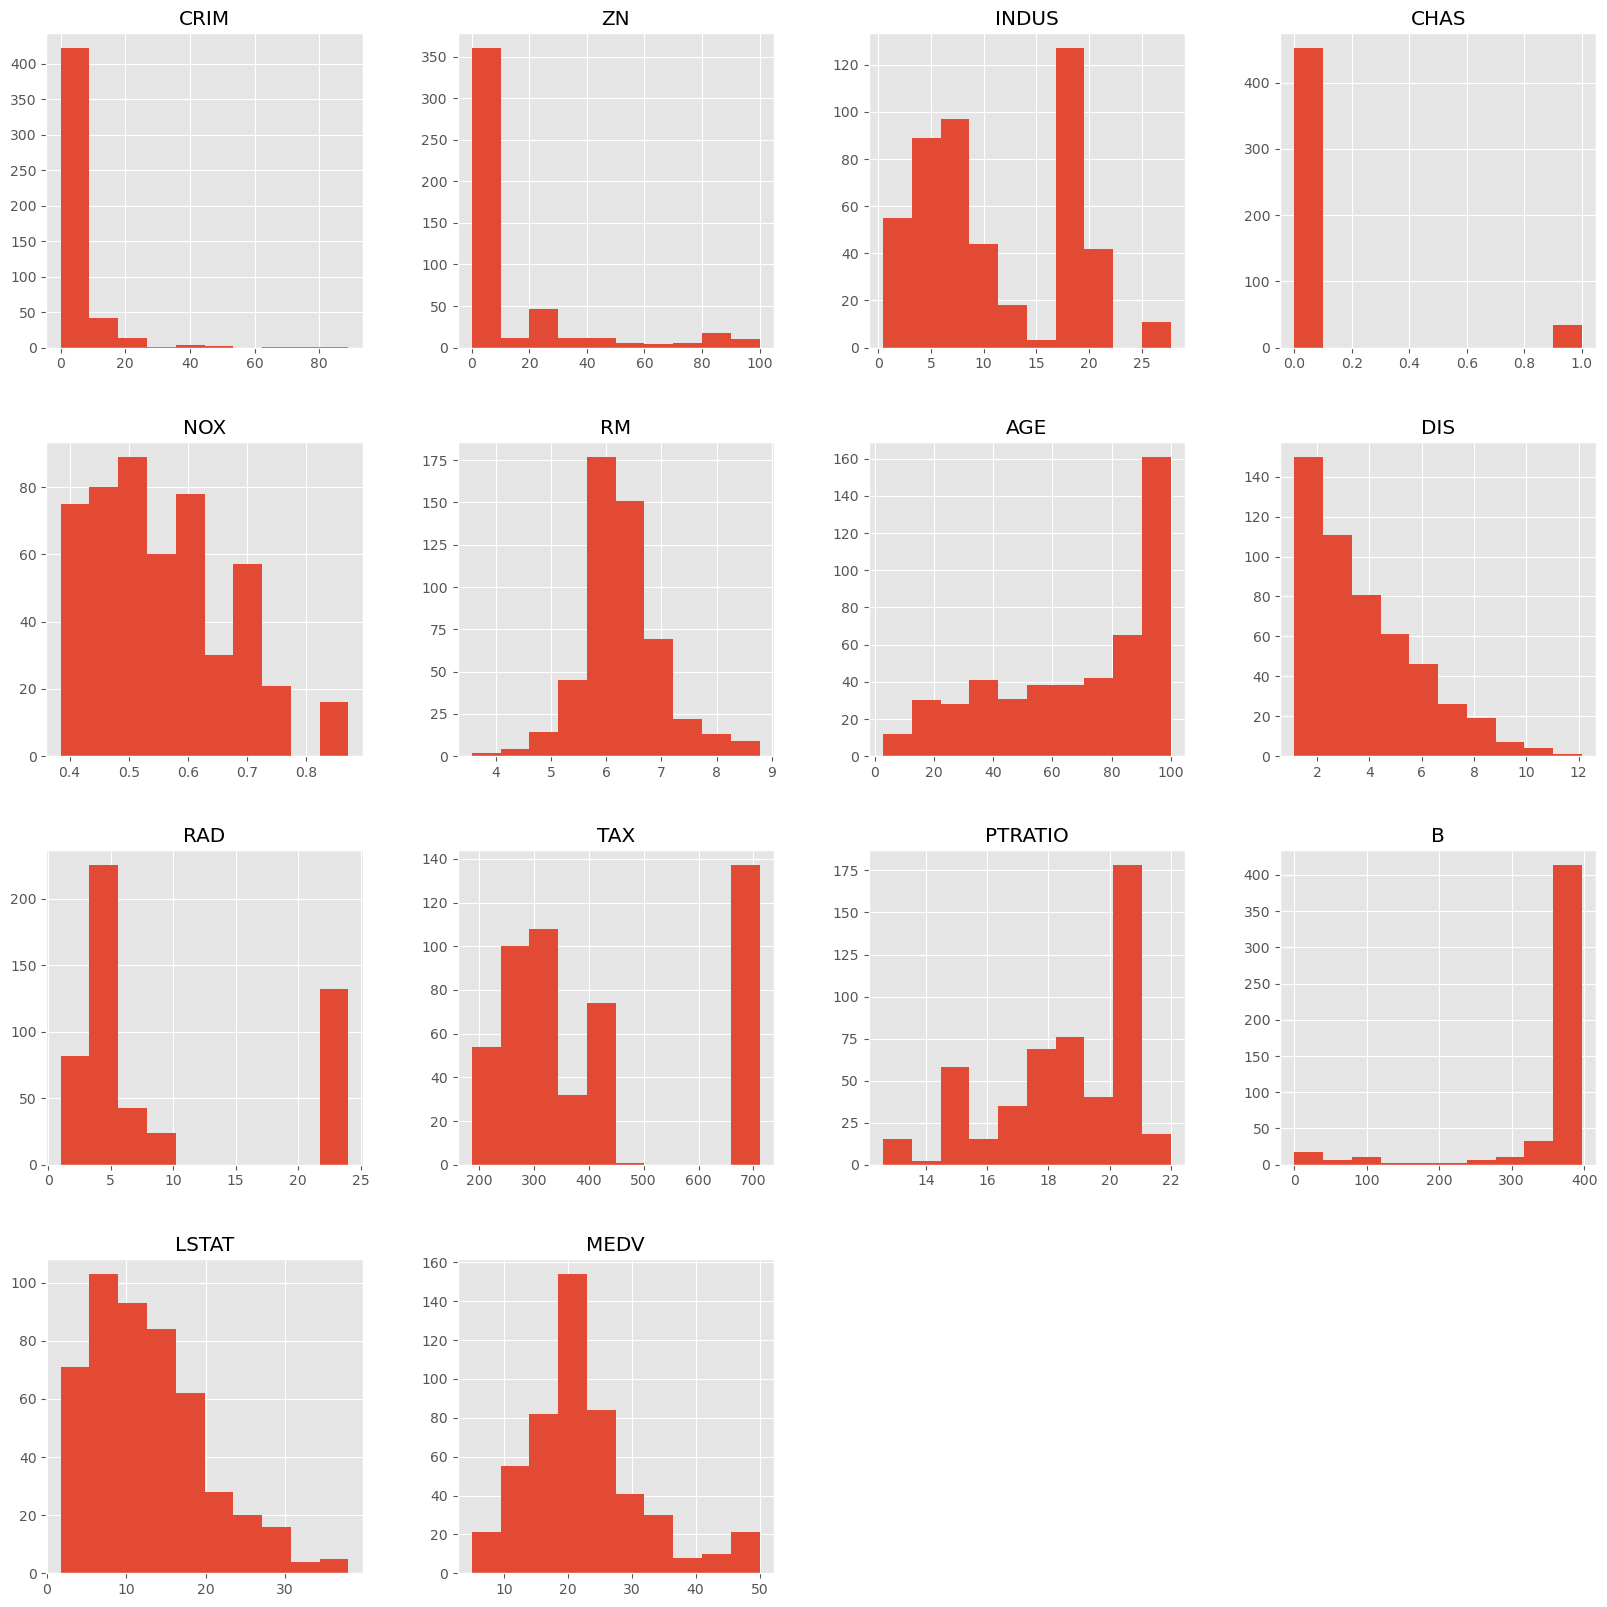

In [16]:
boston.hist(figsize=(20, 20))

In [17]:
X,y = boston.drop(columns='MEDV'), boston['MEDV']

In [18]:
# Select features: We drop the chas and zn columns as they lack information
X = X.drop(columns=['CHAS', 'ZN'])

In [19]:
# Drop rows with MEDV >= 50 since these are outleir caused due to censoring of data.
X = X[y < 50]
y = y[y < 50]

In [20]:
# Imputing missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

In [21]:
sc = StandardScaler()
X = sc.fit_transform(X)
y = y.values.reshape(-1, 1)

In [22]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

## 3.2 MLP Regression Implementation from Scratch

In [23]:
# Import mse, rmse and r2 score
from sklearn.metrics import mean_squared_error, r2_score

def root_mean_squared_error(y, y_hat):
    return np.sqrt(mean_squared_error(y, y_hat))

In [24]:
class MLPRegressor:
    def __init__(self, hidden_layers, epochs=100, learning_rate=0.01, activation='sigmoid', optimizer='sgd', logging=False):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = []
        self.biases = []
        self.n_hidden = len(hidden_layers)
        self.hidden_layer_sizes = hidden_layers
        
        self.output_size = 1
        self.classes = None
        self.input_size = None
        
        self.logging = logging
        
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_deriv = sigmoid_deriv
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_deriv = tanh_deriv
        elif activation == 'relu':
            self.activation = relu
            self.activation_deriv = relu_deriv
        else:
            raise ValueError('Activation function not recognized')
        
        if optimizer == 'sgd':
            self.optimizer = self.sgd
        elif optimizer == 'batch':
            self.optimizer = self.batch
        elif optimizer == 'mini-batch':
            self.optimizer = self.mini_batch
        else:
            raise ValueError('Optimizer not recognized')
        
    def get_params(self):
        return {'epochs': self.epochs, 'learning_rate': self.learning_rate, 'hidden_layers': self.hidden_layer_sizes,
                 'optimizer': self.optimizer.__name__, 'activation': self.activation.__name__}

    def get_loss(self, X, y_one_hot):
        # Get activations :
        activations = self.forward_propagation(X)
        loss = mean_squared_error(activations, y_one_hot)
        return loss

    def initialise_parameters(self):
        for i in range(self.n_hidden):
            if i == 0:
                self.weights.append(np.random.randn(self.input_size, self.hidden_layer_sizes[i]) / np.sqrt(self.input_size))
                self.biases.append(np.zeros((1, self.hidden_layer_sizes[i])))
            else:
                self.weights.append(np.random.randn(self.hidden_layer_sizes[i-1], self.hidden_layer_sizes[i]) / np.sqrt(self.hidden_layer_sizes[i-1]))
                self.biases.append(np.zeros((1, self.hidden_layer_sizes[i])))
        self.weights.append(np.random.randn(self.hidden_layer_sizes[-1], self.output_size) / np.sqrt(self.hidden_layer_sizes[-1]))
        self.biases.append(np.zeros((1, self.output_size)))

    def forward_propagation(self, X):
        # Cache to store a, a_deriv and z for each layer
        cache = []
        for i in range(self.n_hidden):
            # Add col of 1s for bias term
            cache.append(dict())
            cache[i]['z'] = np.dot(X, self.weights[i]) + self.biases[i]
            cache[i]['a'] = self.activation(cache[i]['z'])
            cache[i]['a_deriv'] = self.activation_deriv(cache[i]['z'])
            X = cache[i]['a']
        
        # Output layer : Uses sigmoid for multilabel as activation
        cache.append(dict())
        cache[-1]['z'] = np.dot(X, self.weights[-1]) + self.biases[-1]
        cache[-1]['a'] = cache[-1]['z'] # Identity activation for output layer
        cache[-1]['a_deriv'] = 1 # Derivative of identity is 1
        
        output = cache[-1]['a']
        return output, cache
    
    def backward_propagation(self, cache, X ,y_ohe):
        # Store gradients for each layer, gradient refers to dJ/dz
        gradients = []
        
        # Output layer
        gradients.append((cache[-1]['a'] - y_ohe)) # dZ_L, L = n_hidden
        
        for i in range(self.n_hidden - 1, -1, -1):
            # Calculate gradients
            gradients.append(np.dot(gradients[-1], self.weights[i+1].T) * cache[i]['a_deriv']) # dZ_i, i = n_hidden-1, ..., 0
            
        # Reverse gradients
        gradients = gradients[::-1]
        return gradients
    
    def sgd(self, X, y):
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        X_ = X[indices, :]
        y_ = y[indices]
        loss = 0
        for i in range(X.shape[0]):
            X_one = X_[i, :].reshape(1, -1)
            y_one = y_[i]
            loss += self.train_on_batch(X_one, y_one)
        loss /= X.shape[0]
        return loss
                
    def batch(self, X, y):
        return self.train_on_batch(X, y)
                
    def mini_batch(self, X, y):
        batch_size = 64
        rng = np.random.default_rng()
        loss = 0
        for i in range(0, len(X), batch_size):
            indices = rng.choice(len(X), size=batch_size, replace=False)
            X_batch = X[indices, :]
            y_batch = y[indices]
            loss += self.train_on_batch(X_batch, y_batch)
        return loss / (len(X) // batch_size)
    
    def train_on_batch(self, batch_X, batch_y):
        # Forward propagation
        activations, cache = self.forward_propagation(batch_X)
        # Calculate loss
        loss = mean_squared_error(activations, batch_y)
        # Backward propagation
        gradients = self.backward_propagation(cache, batch_X, batch_y)
        # Update params
        self.weights[0] -= self.learning_rate * np.dot(batch_X.T, gradients[0]) / len(batch_X)
        self.biases[0] -= self.learning_rate * np.sum(gradients[0], axis=0, keepdims=True) / len(batch_X)
        for i in range(1, self.n_hidden + 1):
            self.weights[i] -= self.learning_rate * np.dot(cache[i-1]['a'].T, gradients[i]) / len(batch_X)
            self.biases[i] -= self.learning_rate * np.sum(gradients[i], axis=0, keepdims=True) / len(batch_X)
        return loss
        
    def fit(self, X, y, val_data=None):
        # Validation data
        if val_data is not None:
            X_val, y_val = val_data
        self.input_size = X.shape[1]
        
        self.initialise_parameters()
        errors = []
        # Train loop
        for run in range(1, self.epochs+1):
            loss = self.optimizer(X, y)

            if self.logging and val_data is not None:
                print(f'Epoch {run} - Loss : {loss}')
                activations, _ = self.forward_propagation(X_val)
                mse = mean_squared_error(activations, y_val)
                rmse = root_mean_squared_error(activations, y_val)
                r2 = r2_score(activations, y_val)
                if wandb.run is not None:
                    wandb.log({'mse': mse, 'rmse': rmse, 'R-squared': r2}, step=run)
                print('Validation set :')
                print('MSE :', mse)
                print('RMSE :', rmse)
                print('R-squared :', r2)
                errors.append(mse)
        return errors
        
    def predict(self, X):
        # Forward propagation
        activations, _ = self.forward_propagation(X)
        return activations

In [31]:
# Testing on Boston housing dataset
mlp = MLPRegressor(hidden_layers=[32, 32], epochs=200, learning_rate=0.001, activation='relu',
                    optimizer='mini-batch', logging=True)
errors = mlp.fit(X_train, y_train, val_data=(X_test, y_test))

Epoch 1 - Loss : 651.4505304924188
Validation set :
MSE : 466.2499379101976
RMSE : 21.592821443947468
R-squared : -6025.905252299154
Epoch 2 - Loss : 598.5948809025041
Validation set :
MSE : 427.7342126509978
RMSE : 20.681736209781754
R-squared : -1729.8507320480699
Epoch 3 - Loss : 554.5505774233858
Validation set :
MSE : 374.7591111601418
RMSE : 19.3586960087745
R-squared : -474.13509796133
Epoch 4 - Loss : 449.66875915487634
Validation set :
MSE : 294.2964229391831
RMSE : 17.155069890244782
R-squared : -141.59887869908704
Epoch 5 - Loss : 308.6545431583293
Validation set :
MSE : 179.39300708465214
RMSE : 13.39376747165084
R-squared : -30.439742313820197
Epoch 6 - Loss : 183.99367081387254
Validation set :
MSE : 78.17962634730316
RMSE : 8.841924357700826
R-squared : -2.9118204038791373
Epoch 7 - Loss : 90.41716482599271
Validation set :
MSE : 42.47612355702215
RMSE : 6.51737090835117
R-squared : 0.016450957232849617
Epoch 8 - Loss : 50.642360139555386
Validation set :
MSE : 36.423179

In [33]:
min(errors)

7.518693546809342

In [34]:
sweep_config_1 = {
    'name': 'optimizer-activation-sweep',
    'group': 'MLP-regression-hyperparams-1',
    'method': 'grid',
    'metric': {
        'name': 'mse',
        'goal': 'minimize'
    },
    'parameters': {
        'activation': {
            'values': ['sigmoid', 'tanh', 'relu']
        },
        'optimizer': {
            'values': ['sgd', 'batch', 'mini-batch']
        }
    }
}

In [35]:
sweep_id_1 = wandb.sweep(sweep_config_1, project='assignment-3')

Create sweep with ID: 4xdmjif9
Sweep URL: https://wandb.ai/arnav-team/assignment-3/sweeps/4xdmjif9


In [36]:
def run():
    wandb.init(group='MLP-regression-hyperparams-1')
    config = wandb.config
    mlp = MLPRegressor(hidden_layers=[20, 20], epochs=20, learning_rate=0.01, activation=config.activation,
                        optimizer=config.optimizer, logging=True)
    mlp.fit(X_train, y_train, val_data=(X_val, y_val))
    # TODO: 
    wandb.finish()

In [37]:
wandb.agent(sweep_id_1, function=run)

Epoch 1 - Loss : 39.91745857548991
Validation set :
MSE : 17.658627392892505
RMSE : 4.2022169616635106
R-squared : 0.4582213419945512
Epoch 2 - Loss : 17.693078334992272
Validation set :
MSE : 11.24263042764945
RMSE : 3.3530031952936534
R-squared : 0.5969980430165416
Epoch 3 - Loss : 15.179836963124036
Validation set :
MSE : 17.007323268289305
RMSE : 4.123993606722651
R-squared : 0.3281793296461396
Epoch 4 - Loss : 12.914869447369082
Validation set :
MSE : 9.087370607103452
RMSE : 3.0145265975113658
R-squared : 0.6721814120481766
Epoch 5 - Loss : 11.279098573897226
Validation set :
MSE : 18.169523789996642
RMSE : 4.262572438093767
R-squared : -0.5388294760485146
Epoch 6 - Loss : 10.73454109594962
Validation set :
MSE : 10.522575385395944
RMSE : 3.243851936416942
R-squared : 0.4720426323982354
Epoch 7 - Loss : 10.67131478199843
Validation set :
MSE : 14.581561543917292
RMSE : 3.8185810903943485
R-squared : 0.45605813912785886
Epoch 8 - Loss : 10.078462472340176
Validation set :
MSE : 8.

Epoch 1 - Loss : 555.3174948333507
Validation set :
MSE : 406.6043541780447
RMSE : 20.16443289998617
R-squared : -2911.78488818042
Epoch 2 - Loss : 523.869389235208
Validation set :
MSE : 380.01461278387836
RMSE : 19.493963496012768
R-squared : -585.7001341659995
Epoch 3 - Loss : 493.45167848893607
Validation set :
MSE : 351.1161201135695
RMSE : 18.73809275549594
R-squared : -191.7241254493365
Epoch 4 - Loss : 460.08364938860325
Validation set :
MSE : 318.61048897785884
RMSE : 17.84966355363201
R-squared : -84.01373075297265
Epoch 5 - Loss : 422.2986455961712
Validation set :
MSE : 282.3690876831888
RMSE : 16.803841456142962
R-squared : -44.713925723006575
Epoch 6 - Loss : 380.04258861291777
Validation set :
MSE : 242.8026907672172
RMSE : 15.582127286324457
R-squared : -27.614643852589108
Epoch 7 - Loss : 333.975395254048
Validation set :
MSE : 201.60563671191022
RMSE : 14.198789973512188
R-squared : -18.727128130517308
Epoch 8 - Loss : 285.9971776350683
Validation set :
MSE : 161.6475

Run vmapu29v errored: ValueError("Input contains infinity or a value too large for dtype('float64').")


Epoch 1 - Loss : 560.4564376333203
Validation set :
MSE : 395.31103751943584
RMSE : 19.882430372553447
R-squared : -2371.828980357507
Epoch 2 - Loss : 505.77835192818947
Validation set :
MSE : 342.11574846147954
RMSE : 18.496371224147712
R-squared : -375.5878973843347
Epoch 3 - Loss : 439.0600179412002
Validation set :
MSE : 244.12690511302375
RMSE : 15.624560957448493
R-squared : -42.25717732588187
Epoch 4 - Loss : 315.3500041280415
Validation set :
MSE : 98.91539210782378
RMSE : 9.945621755718633
R-squared : -1.6215906830099023
Epoch 5 - Loss : 126.91767508707782
Validation set :
MSE : 70.21916605249918
RMSE : 8.379687706143898
R-squared : 0.3714587404534462
Epoch 6 - Loss : 79.65366956434586
Validation set :
MSE : 60.92918556415137
RMSE : 7.805714929726256
R-squared : -1.414676151099954
Epoch 7 - Loss : 74.27062676181124
Validation set :
MSE : 49.639323666695084
RMSE : 7.045517984271638
R-squared : 0.36742302078258726
Epoch 8 - Loss : 51.74678063523206
Validation set :
MSE : 48.6025

In [38]:
sweep_config_2 = {
    'name': 'learning-rate-epochs-hidden-layers-sweep',
    'group': 'MLP-regression-hyperparams-2',
    'method': 'grid',
    'metric': {
        'name': 'f1',
        'goal': 'maximize'
    },
    'parameters': {
        'learning_rate': {
            'values': [0.1, 0.01, 0.001]
        },
        'epochs': {
            'values': [20, 50, 100]
        },
        'hidden_layers': {
            'values': [[10, 10], [20, 20], [30, 30]]
        }
    }
}

In [39]:
sweep_id_2 = wandb.sweep(sweep_config_2, project='assignment-3')

Create sweep with ID: klvviygo
Sweep URL: https://wandb.ai/arnav-team/assignment-3/sweeps/klvviygo


In [40]:
def run_2():
    wandb.init(group='MLP-regression-hyperparams-2')
    config = wandb.config
    mlp = MLPRegressor(hidden_layers=config.hidden_layers, epochs=config.epochs, learning_rate=config.learning_rate,
                        activation='sigmoid', optimizer='mini-batch', logging=True)
    mlp.fit(X_train, y_train, val_data=(X_val, y_val))
    # TODO: 
    wandb.finish()

In [41]:
wandb.agent(sweep_id_2, function=run_2)

Epoch 1 - Loss : 178.39706068136647
Validation set :
MSE : 24.721633920955004
RMSE : 4.972085469996971
R-squared : -3.2214697726227897
Epoch 2 - Loss : 37.029452958653415
Validation set :
MSE : 21.301229710439838
RMSE : 4.615325525945037
R-squared : -0.22293662702643702
Epoch 3 - Loss : 29.447716105916715
Validation set :
MSE : 12.32911917354681
RMSE : 3.511284547504917
R-squared : 0.4634048350029172
Epoch 4 - Loss : 28.17904149309857
Validation set :
MSE : 10.339461588265317
RMSE : 3.2155033180305255
R-squared : 0.5505670257651591
Epoch 5 - Loss : 25.60714398602177
Validation set :
MSE : 54.799427418772126
RMSE : 7.402663535429132
R-squared : -0.10333204765509896
Epoch 6 - Loss : 21.427643192125696
Validation set :
MSE : 10.69174105134412
RMSE : 3.2698227859234392
R-squared : 0.5521422973134094
Epoch 7 - Loss : 23.644831898866737
Validation set :
MSE : 15.425418648072803
RMSE : 3.9275206744297098
R-squared : 0.5531713397841828
Epoch 8 - Loss : 19.12917715006704
Validation set :
MSE : 

Epoch 1 - Loss : 142.38648433415747
Validation set :
MSE : 78.01259928818807
RMSE : 8.832474131758783
R-squared : -3.8918894194705853
Epoch 2 - Loss : 71.01490586202802
Validation set :
MSE : 30.099189705169813
RMSE : 5.486272842756712
R-squared : 0.005457509221653778
Epoch 3 - Loss : 28.275354215675424
Validation set :
MSE : 14.08158441017167
RMSE : 3.7525437252844465
R-squared : 0.37573838228340684
Epoch 4 - Loss : 27.252597464459843
Validation set :
MSE : 16.874917888637242
RMSE : 4.107909186999786
R-squared : 0.5362496636732511
Epoch 5 - Loss : 19.3261531951334
Validation set :
MSE : 10.4465587718866
RMSE : 3.2321136693944723
R-squared : 0.5712616496078211
Epoch 6 - Loss : 20.215986624718877
Validation set :
MSE : 28.570172511799107
RMSE : 5.345107343337373
R-squared : 0.22263596855997292
Epoch 7 - Loss : 34.472338421167244
Validation set :
MSE : 12.954277982272279
RMSE : 3.5992051875757625
R-squared : 0.2991225009095997
Epoch 8 - Loss : 19.73657951847652
Validation set :
MSE : 14.

In [42]:
# Testing on test set
mlp = MLPRegressor(hidden_layers=[20, 20], epochs=100, learning_rate=0.01, activation='sigmoid',
                    optimizer='sgd', logging=False)
mlp.fit(X_train, y_train, val_data=(X_val, y_val))

[]

In [43]:
y_pred = mlp.predict(X_test)
print('Test set :')
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE :', root_mean_squared_error(y_test, y_pred))
print('R-squared :', r2_score(y_test, y_pred))

Test set :
MSE : 5.1858333082561465
RMSE : 2.2772424790206567
R-squared : 0.9216046178156341
